参考資料：http://www-it.sci.waseda.ac.jp/CPR2/classx1/slides/Cpro2_10th.pdf

http://www.ep.sci.hokudai.ac.jp/~gfdlab/comptech/y2011/resume/0526/2011_0526-ogihara.pdf

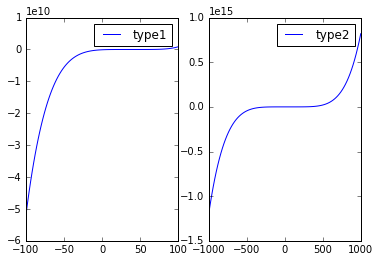

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

e = 10**-6
f = lambda x:(x - 39)**5 + (x-37)**2 + 39*x + 200
x1 = np.linspace(-100,100,100)
x2 = np.linspace(-1000,1000,100)
y1 = f(x1)
y2 = f(x2)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#この時点で描画されるっぽい
ax1.plot(x1,y1,label='type1')
ax2.plot(x2,y2,label='type2')

#凡例
ax1.legend()
ax2.legend()

#plt.show()

# これは存在しない！
# ax1.show()
# ax2.show()

# 二分法

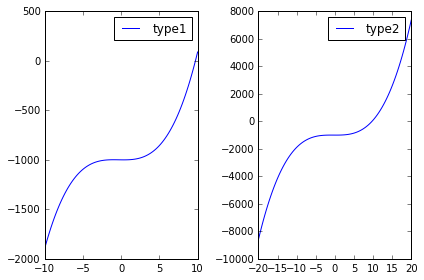

In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = lambda x:x**3 + x**2 -x -10**3
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-20,20,100)
y1 = f(x1)
y2 = f(x2)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x1,y1,label='type1')
ax2.plot(x2,y2,label='type2')

#凡例
ax1.legend()
ax2.legend()

#グラフが重なる場合に使用
plt.tight_layout()
plt.show()

In [88]:
# 関数化
def bisection(a:int, b:int, e:float, f):
    #初期値の設定
    fa = f(a)
    fb = f(b)
    c  = (a+b)/2
    fc = f(c)
    print('*----------Processing----------*')

    # 解探索
    while(True):
        if abs(fc) < e:
            print('*-------------end-------------*')
            print(f'solition:{c:.6f}')
            break
        elif fc*fa > 0:
            a = c
            fa = fc
            c = (a+b)/2
            fc = f(c)
            # prefixで記述 -> https://note.nkmk.me/python-f-strings/
            print(f'a={a:.6f},b={b:.6f}')
        elif fc*fb > 0:
            b = c
            fb = fc
            c = (a+b)/2
            fc = f(c)
            print(f'a={a:.6f},b={b:.6f}')
    return c

if __name__ == '__main__':
    # 初期値の設定
    a,b=-20,20
    e  = 1e-7
    res = bisection(a,b,e,f)
    print('calc_result:',f(res))

*----------Processing----------*
a=0.000000,b=20.000000
a=0.000000,b=10.000000
a=5.000000,b=10.000000
a=7.500000,b=10.000000
a=8.750000,b=10.000000
a=9.375000,b=10.000000
a=9.687500,b=10.000000
a=9.687500,b=9.843750
a=9.687500,b=9.765625
a=9.687500,b=9.726562
a=9.707031,b=9.726562
a=9.707031,b=9.716797
a=9.707031,b=9.711914
a=9.709473,b=9.711914
a=9.709473,b=9.710693
a=9.709473,b=9.710083
a=9.709473,b=9.709778
a=9.709625,b=9.709778
a=9.709702,b=9.709778
a=9.709740,b=9.709778
a=9.709740,b=9.709759
a=9.709749,b=9.709759
a=9.709754,b=9.709759
a=9.709756,b=9.709759
a=9.709758,b=9.709759
a=9.709758,b=9.709759
a=9.709758,b=9.709759
a=9.709759,b=9.709759
a=9.709759,b=9.709759
a=9.709759,b=9.709759
a=9.709759,b=9.709759
a=9.709759,b=9.709759
a=9.709759,b=9.709759
a=9.709759,b=9.709759
*-------------end-------------*
solition:9.709759
calc_result: 6.797995411034208e-08


# ニュートンラプソン法
### 定義
\begin{aligned} x_{n+1} &=x_n - \frac{f(x_n)}{f'(x_n)} \end{aligned}

In [93]:
# 数値微分 http://www.f.waseda.jp/yusukekondo/TALLFALL19/TALLFALL0301.html
def numerical_diff(x,f):
    h = 1e-4 # 0.0001
    nd = (f(x+h) - f(x-h))/(2 * h)
    return nd

def NewtonMethod(x:float, e:float, f, max_cnt = 20):
    i=0
    df = numerical_diff
    print(f'start_x={x:.6f}')
    print('*----------Processing----------*')
    while(True):
        x_new = x - f(x)/df(x,f)
        x = x_new
        print(f'x={x:.6f}')
        i += 1
        if abs(f(x) < e) or i > max_cnt:
            break
    print('*-------------end-------------*')
    print(f'solution:{x:.6f}')
    
    return x
    
if __name__ == '__main__':
    x = 15
    e = 1e-7
    res = NewtonMethod(x,e,f)
    print('calc_result:',f(res))

start_x=15.000000
*----------Processing----------*
x=11.328125
x=9.924667
x=9.714249
x=9.709761
x=9.709759
*-------------end-------------*
solition:9.709759
calc_result: 1.2244072422618046e-10
